In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = "data_doble_laser.xlsx"
data = pd.read_excel(data)
print(data)

     x_desf (um)  V(mV)  x_error (um)  V_error (mV)  x_desf (m)   V (V)  \
0          -5860   19.3             5           0.1    -0.00586  0.0193   
1          -5840   19.6             5           0.1    -0.00584  0.0196   
2          -5820   19.9             5           0.1    -0.00582  0.0199   
3          -5800   20.4             5           0.1    -0.00580  0.0204   
4          -5780   21.3             5           0.1    -0.00578  0.0213   
..           ...    ...           ...           ...         ...     ...   
260         -660  719.5             5           0.1    -0.00066  0.7195   
261         -640  699.5             5           0.1    -0.00064  0.6995   
262         -620  683.5             5           0.1    -0.00062  0.6835   
263         -600  664.5             5           0.1    -0.00060  0.6645   
264         -580  655.5             5           0.1    -0.00058  0.6555   

     x_error (m)  V_error (V)  
0       0.000005       0.0001  
1       0.000005       0.0001  
2  

In [2]:
# Define the linear function for curve fitting
def frauhofer_approximated_double_function(X, A, C, D):
    return np.abs(A)*( ( np.cos( np.abs(D)*X ) )**2 )*( ( ( np.sin( np.abs(C)*X ) + 1e-12 )/( np.abs(C)*X + 1e-12 ) )**2 )

# Perform the curve fitting considering the uncertainties
popt, pcov = curve_fit( frauhofer_approximated_double_function, data['x_desf (m)'], data['V (V)'], p0 = (1.2415, 468.89, 1669.26), sigma=data['V_error (V)'], absolute_sigma=True, maxfev = 10000 )

A: 1.2291063579617028 ± 2.9428510401252123e-05
C: 674.5595608756224 ± 0.014242910682764509
D: 3164.9532886223747 ± 0.011072983359852248


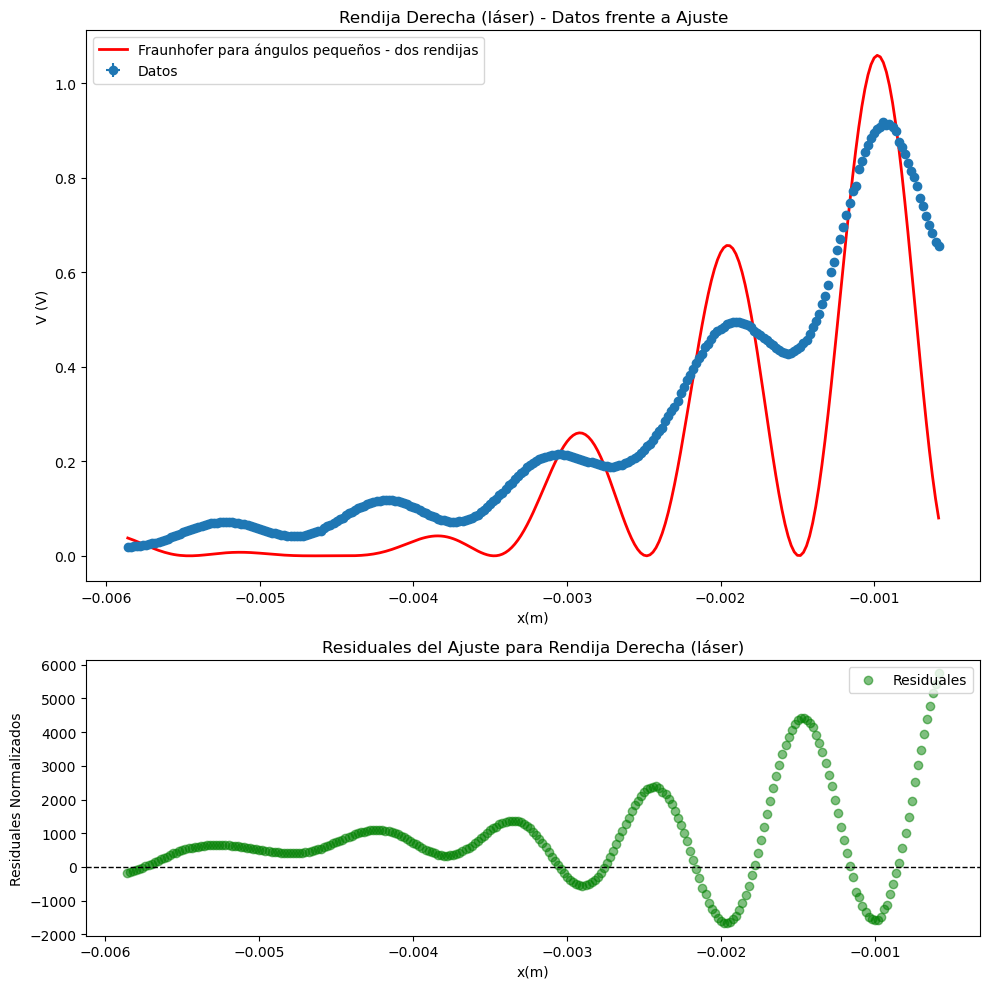

In [3]:
# Get the slope and intercept
A = popt[0]
C = popt[1]
D = popt[2]
#L = popt[3]

# Get the standard errors for the parameters
A_std_err = np.sqrt(pcov[0, 0])
C_std_err = np.sqrt(pcov[1, 1])
D_std_err = np.sqrt(pcov[2, 2])
#L_std_err = np.sqrt(pcov[3, 3])

## Setting variables
x = data['x_desf (m)']
y = data['V (V)']
yerr = data['V_error (V)']
xerr = data['x_error (m)']

# Predict the Y values
Y_pred = frauhofer_approximated_double_function(x, *popt)

# Calculate normalized residuals
residuals = (y - Y_pred)/yerr

print(f"A: {A} ± {A_std_err}")
print(f"C: {C} ± {C_std_err}")
print(f"D: {D} ± {D_std_err}")
#print(f"L: {L} ± {L_std_err}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, xerr,  fmt='o', label='Datos')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Fraunhofer para ángulos pequeños - dos rendijas')

ax1.set_xlabel('x(m)')
ax1.set_ylabel('V (V)')
ax1.legend(loc='upper left')
ax1.set_title('Rendija Derecha (láser) - Datos frente a Ajuste')

# Plot normalized residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuales')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('x(m)')
ax2.set_ylabel('Residuales Normalizados')
ax2.legend(loc='upper right')
ax2.set_title('Residuales del Ajuste para Rendija Derecha (láser)')

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('rendija_doble_láser.pdf', format='pdf')
plt.show()

